On commence par importer les librairies que l'on utilisera, et à régler certains paramètres de résolution des figures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 240
plt.rcParams['savefig.dpi'] = 240

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

# Exercice 1

1) On réutilise pour cela une partie des codes du premier TP.

In [29]:
def ex1_eulerexp(f,x0,Tf,N):
    T=np.linspace(0,Tf,N+1)
    dt=Tf/N
    X=np.zeros(N+1)
    X[0]=x0
    for i in range(N):
        X[i+1]=X[i]+dt*f(T[i],X[i])
    return X

2) 

In [30]:
def ex1_rungekutta(f,x0,Tf,N):
    T=np.linspace(0,Tf,N+1)
    dt=Tf/N
    X=np.zeros(N+1)
    X[0]=x0
    for i in range(N):
        k1=f(T[i],X[i])
        k2=f(T[i]+dt/2,X[i]+k1*dt/2)
        k3=f(T[i]+dt/2,X[i]+k2*dt/2)
        k4=f(T[i]+dt,X[i]+k3*dt)
        X[i+1]=X[i]+dt*(k1+2*k2+2*k3+k4)/6
    return X

3) 

In [31]:
def ex1_comparaison(N):
    T=np.linspace(0,1,N+1)
    Xeu=ex1_eulerexp(lambda t,x:5*x ,1,1,N)#l'écriture lambda a:(formule en a) est une manière compacte de définir une fonction
    Xru=ex1_rungekutta(lambda t,x:5*x ,1,1,N)
    Xex=np.exp(5*T)#solution exacte
    plt.plot(T,Xeu,label='Euler explicite')
    plt.plot(T,Xru,label='Runge-Kutta')
    plt.plot(T,Xex,label='Solution exacte')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend(loc='upper left')

On teste cela avec $N=4$: un nombre d'étape très petit, dans lequel on remarque que la méthode de Runge-Kutta a déjà convergé bien plus vite que la méthode d'Euler explicite.

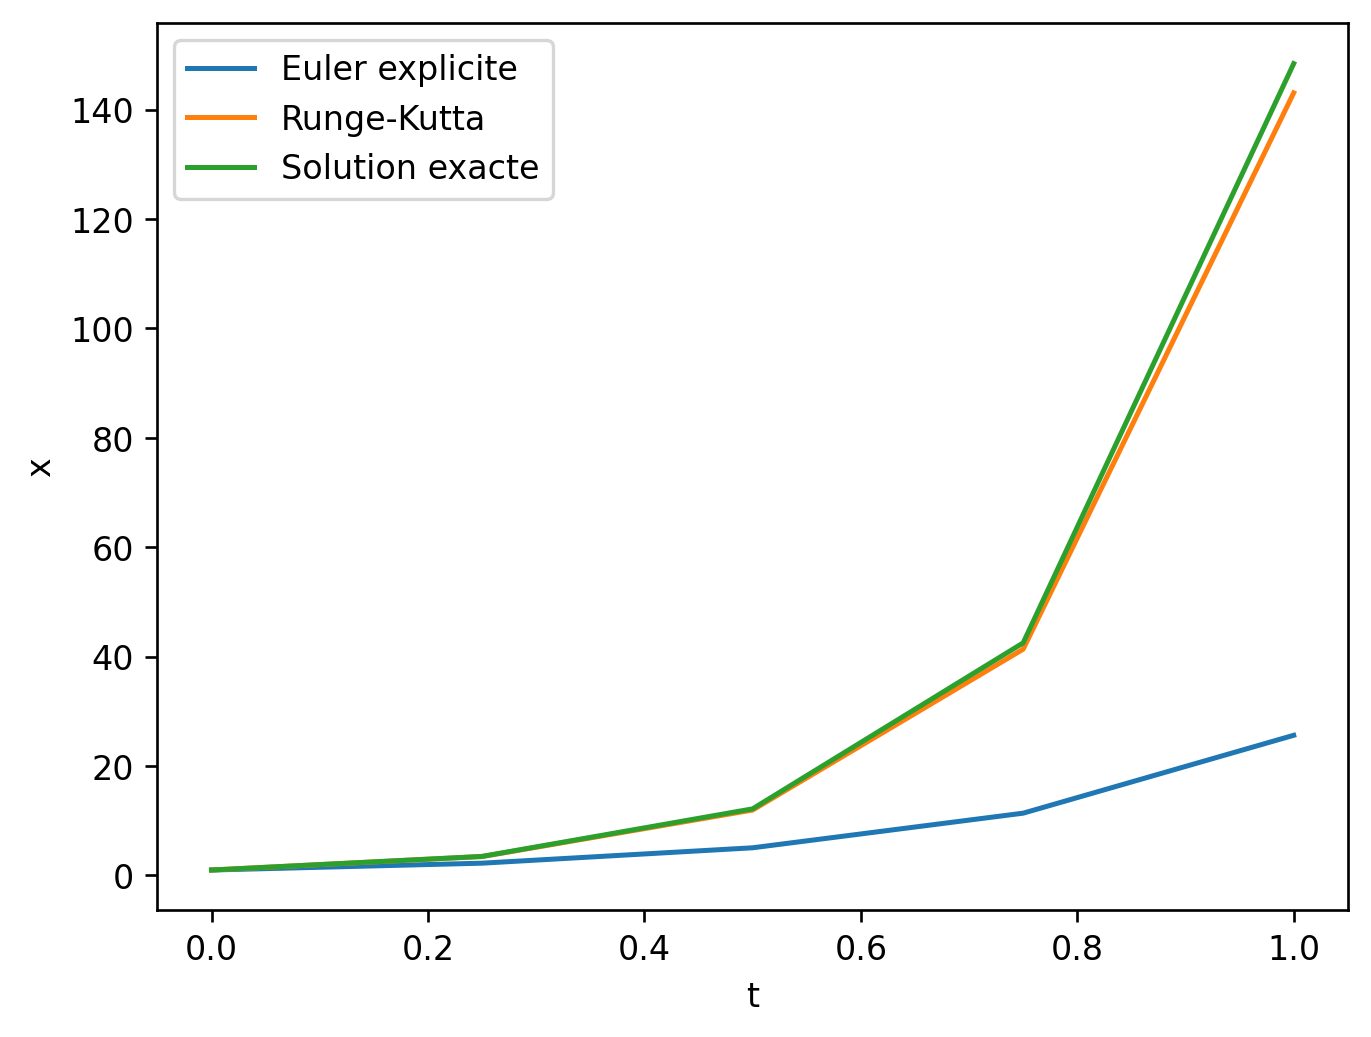

In [32]:
ex1_comparaison(4)

Pour $N=10$, la méthode de Runge-Kutta est déjà visuellement indiscernable de la solutione exacte (pour cet exemple précis), tandis que la méthode d'Euler explicite est encore loin.

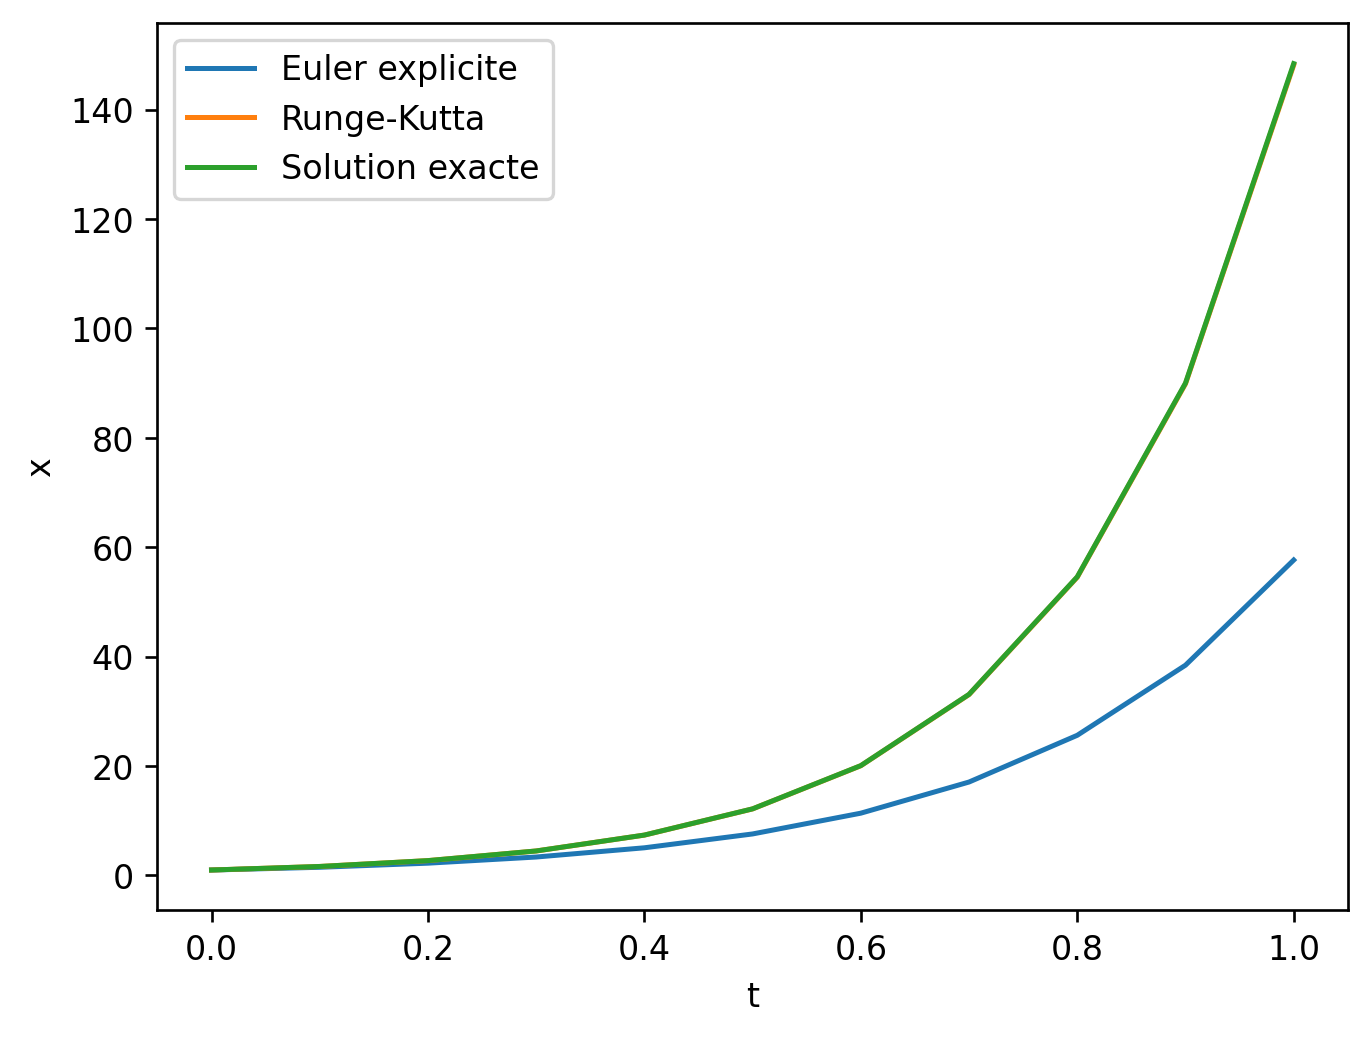

In [33]:
ex1_comparaison(10)

4) On va écrire une fonction légerement plus générale: celle-ci prend en entrée une fonction $f:\mathbb{R}\times\mathbb{R}^p\to\mathbb{R}^p$ pour un $p\geq 1$, une condition initiale $x^{init}\in\mathbb{R}^p$, un temps final $T_f$ et un nombre de pas $N$, et calcule la solution associée à l'équation différentielle $\dot{x}=f(t,x)$ avec la condition initiale $x(0)=x^{init}$: il faut voir cette équation comme un système
$$
\dot{x}_{1}=f_1(t,x_1,..,x_p),\ x_1(0)=x_1^{init}
$$
$$
\dot{x}_{2}=f_2(t,x_1,..,x_p),\ x_2(0)=x_2^{init}
$$
$$
...
$$
$$
\dot{x}_{p}=f_p(t,x_1,..,x_p),\ x_p(0)=x_p^{init}
$$
Et on écrit cela de manière à ce que cela s'adapte à $p$.



In [34]:
def GeneralEuler(g,x_init,T_fin,N):
    T=np.linspace(0,T_fin,N+1)
    dt=T_fin/N
    dim=np.size(x_init)#nombre de composante
    X=np.zeros([N+1,dim])#X[i,k] est la valeur au temps T[i] de la k-ième composante
    X[0,:]=x_init
    for i in range(N):
        X[i+1]=X[i]+dt*g(T[i],X[i])
    return X

def GeneralRK4(g,x_init,T_fin,N):
    T=np.linspace(0,T_fin,N+1)
    dt=T_fin/N
    dim=np.size(x_init)
    X=np.zeros([N+1,dim])
    X[0,:]=x_init
    for i in range(N):
        k1=g(T[i],X[i])
        k2=g(T[i]+dt/2,X[i]+k1*dt/2)
        k3=g(T[i]+dt/2,X[i]+k2*dt/2)
        k4=g(T[i]+dt,X[i]+k3*dt)
        X[i+1]=X[i]+dt*(k1+2*k2+2*k3+k4)/6
    return X

On applique maintenant cela à l'équation du pendule linéairisé $\ddot{x}=-9x$, avec la condition initiale $x(0)=1$, $\dot{x}(0)=0$. La fonction associée est $(f(t,x,y),g(t,x,y))=(y,-9 x)$.



In [35]:
def ex1_comparaison_pendule(Tf,N):
    T=np.linspace(0,Tf,N+1)
    Xeu=GeneralEuler(lambda t,P:np.array([P[1],-9*P[0]]),np.array([1,0]),Tf,N)#l'écriture lambda a:(formule en a) est une manière compacte de définir une fonction
    Xru=GeneralRK4(lambda t,P:np.array([P[1],-9*P[0]]),np.array([1,0]),Tf,N)
    Xex=np.cos(3*T)#solution exacte
    plt.plot(T,Xeu[:,0],label='Euler explicite')
    plt.plot(T,Xru[:,0],label='Runge-Kutta')
    plt.plot(T,Xex,label='Solution exacte')
    plt.xlabel('t')
    plt.ylabel('x')
    print("Erreur d'approximation par la méthode d'Euler Explicite: ",np.max(np.abs(Xeu[:,0]-Xex)))
    print("Erreur d'approximation par la méthode RK4: ",np.max(np.abs(Xru[:,0]-Xex)))
    plt.legend(loc='upper left')

On peut déjà observer que dans ce cas, un nombre de pas trop faible fait diverger la méthode d'Euler:

Erreur d'approximation par la méthode d'Euler Explicite:  83.5277695494207
Erreur d'approximation par la méthode RK4:  0.03794368707050222


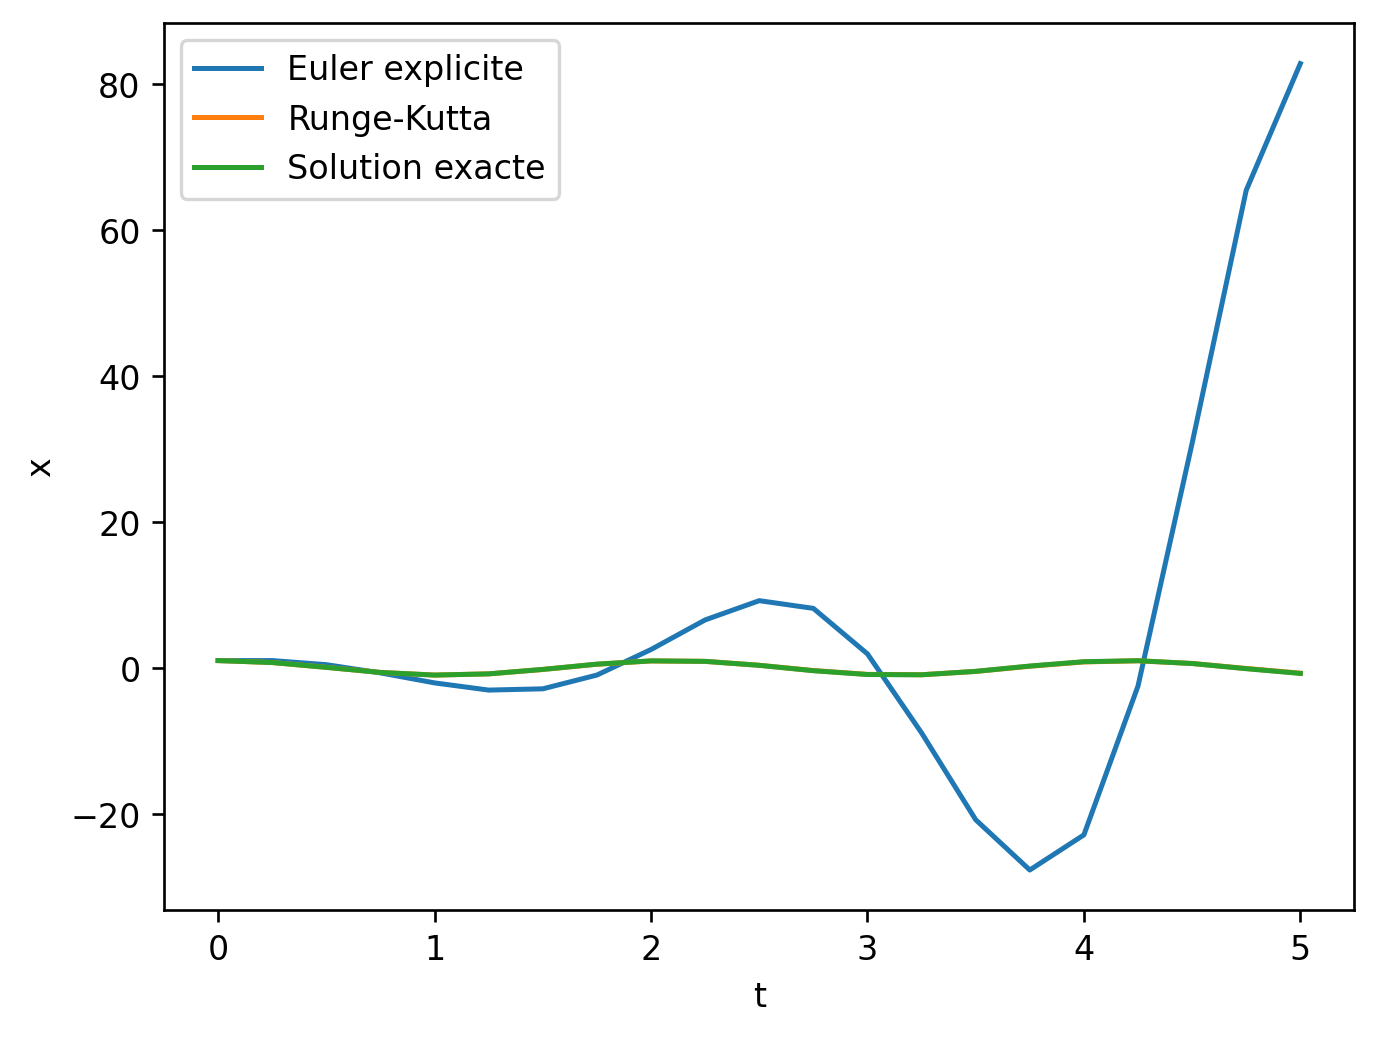

In [36]:
ex1_comparaison_pendule(5,20)

Avec plus de pas, on obtient:

Erreur d'approximation par la méthode d'Euler Explicite:  3.8574896834540464
Erreur d'approximation par la méthode RK4:  0.00046608865767289176


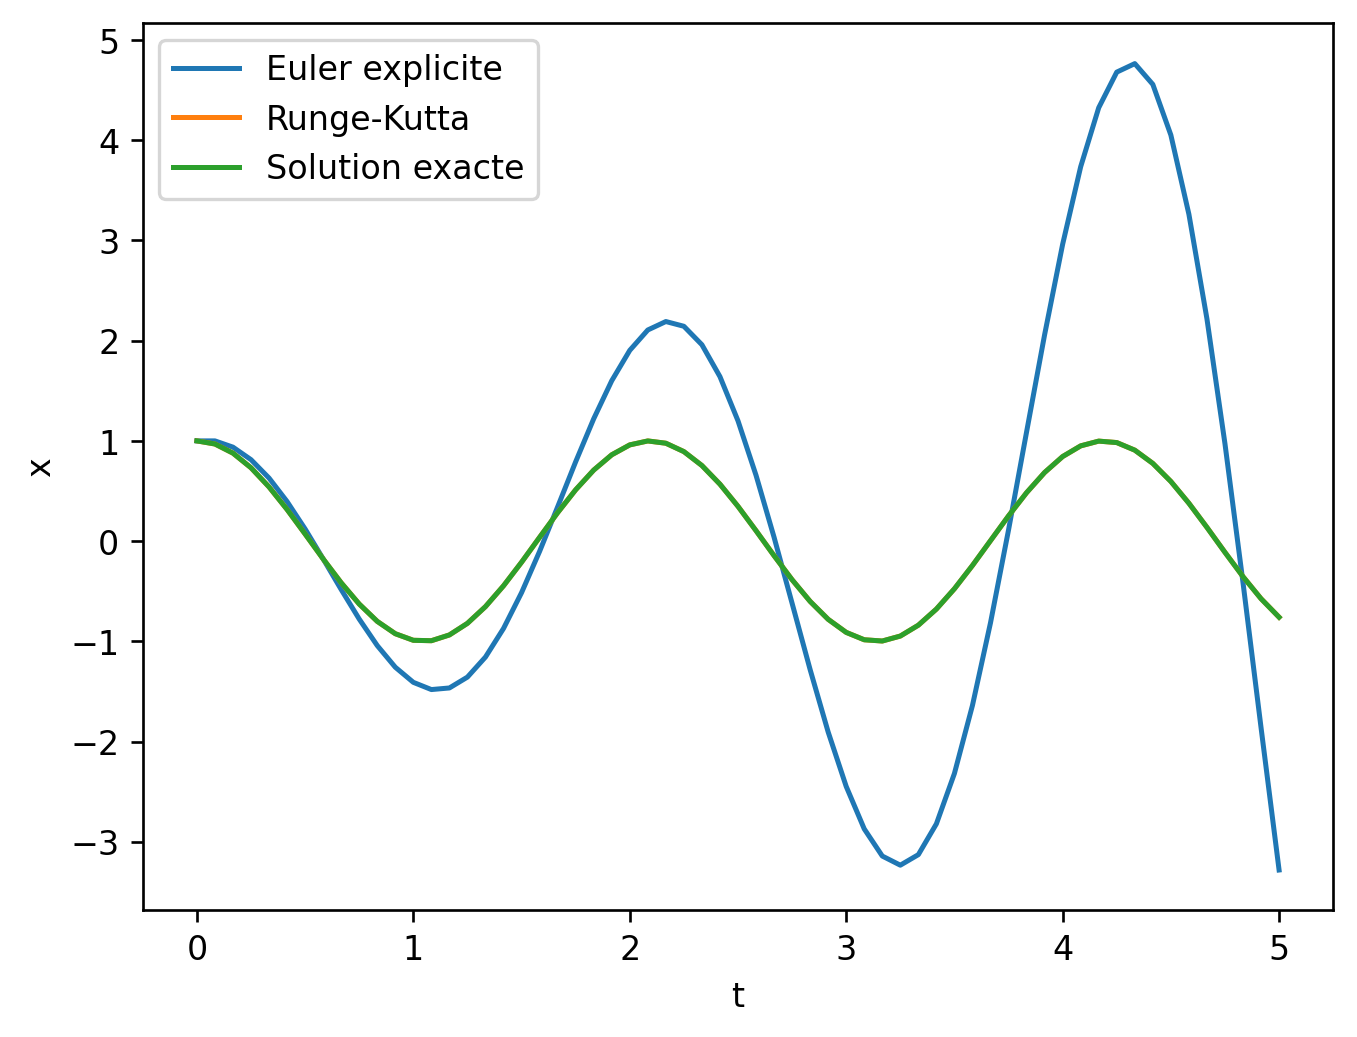

In [37]:
ex1_comparaison_pendule(5,60)

On augmente encore le nombre de pas:

Erreur d'approximation par la méthode d'Euler Explicite:  0.009500176281016293
Erreur d'approximation par la méthode RK4:  5.986183770900766e-13


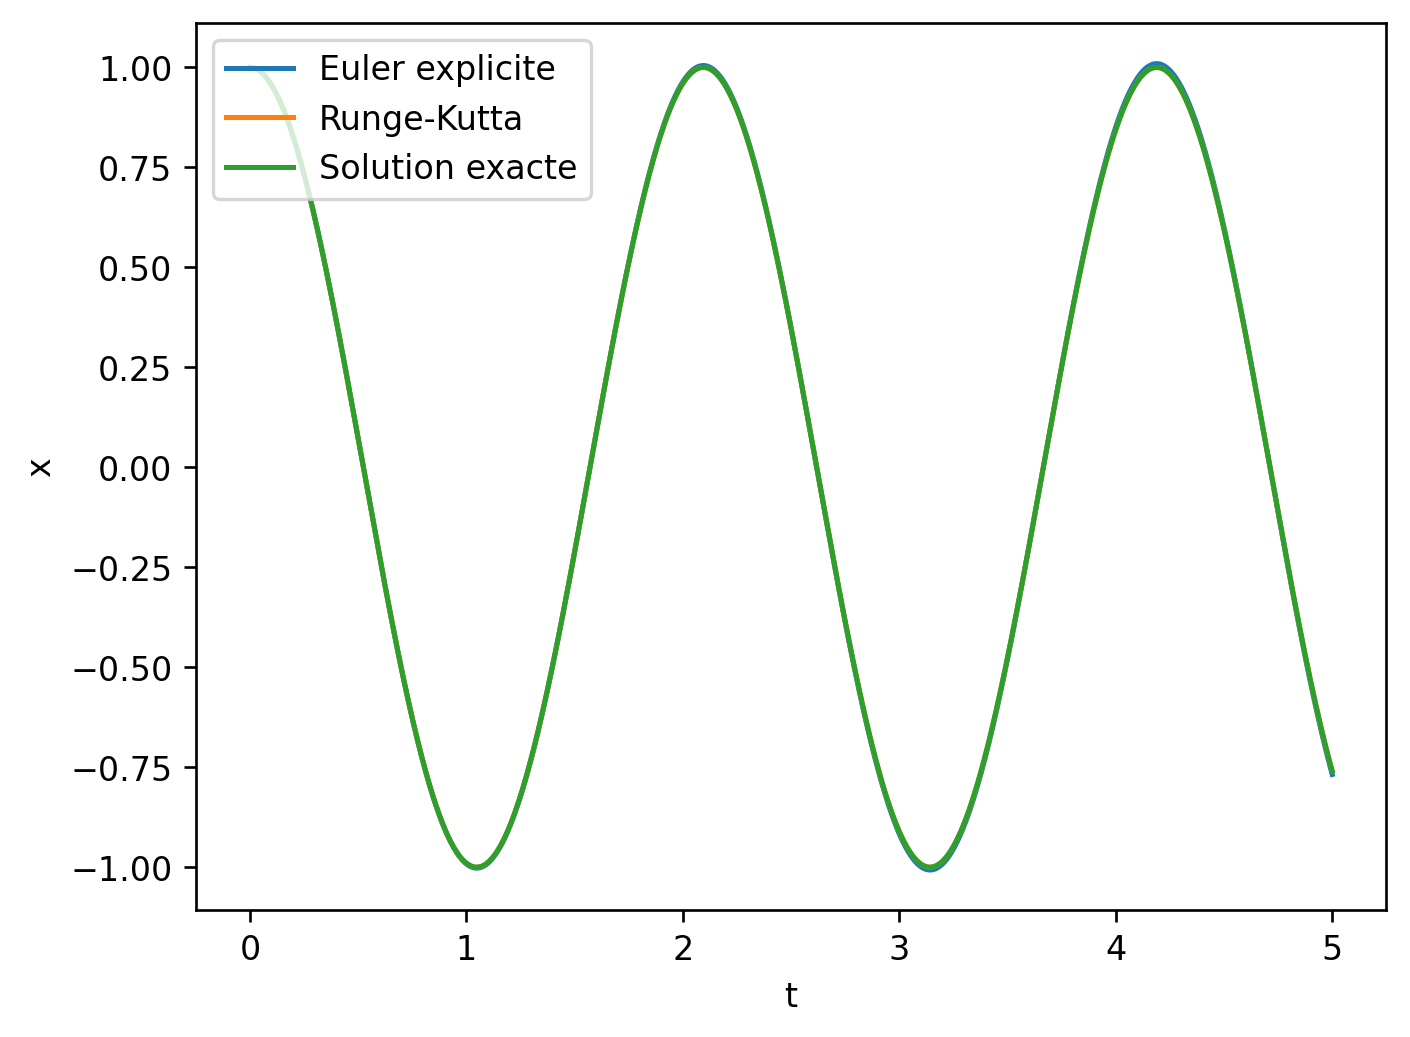

In [38]:
ex1_comparaison_pendule(5,10000)

Bien que les courbes soient ici visuellement indiscernable, l'erreur entre la courbe obtenue par méthode d'Euler reste de l'ordre de $1\%$, tandis que l'erreur par la méthode de Runge-Kutta est de l'ordre de $10^{-13}$.

# Exercice 2



1) Pour calculer numériquement la solution, on va utiliser la fonction GeneralRK4 que l'on a introduit précedemment. On pourrait aussi refaire à la main une fonction adaptée.

Comme (après expérimentation) les populations semblent stagner après un temps suffisament grand (de l'ordre de 5), pour calculer les limites on va simplement calculer les solutions jusqu'à un temps assez grand (on prend $T^{fin}=12$ par sécurité.)


Population saine au temps T= 12 :  28.4481805331818
Population malade au temps T= 12 :  1.3324546426767053e-08
Population guéris/décédée au temps T= 12 :  72.55181945349368


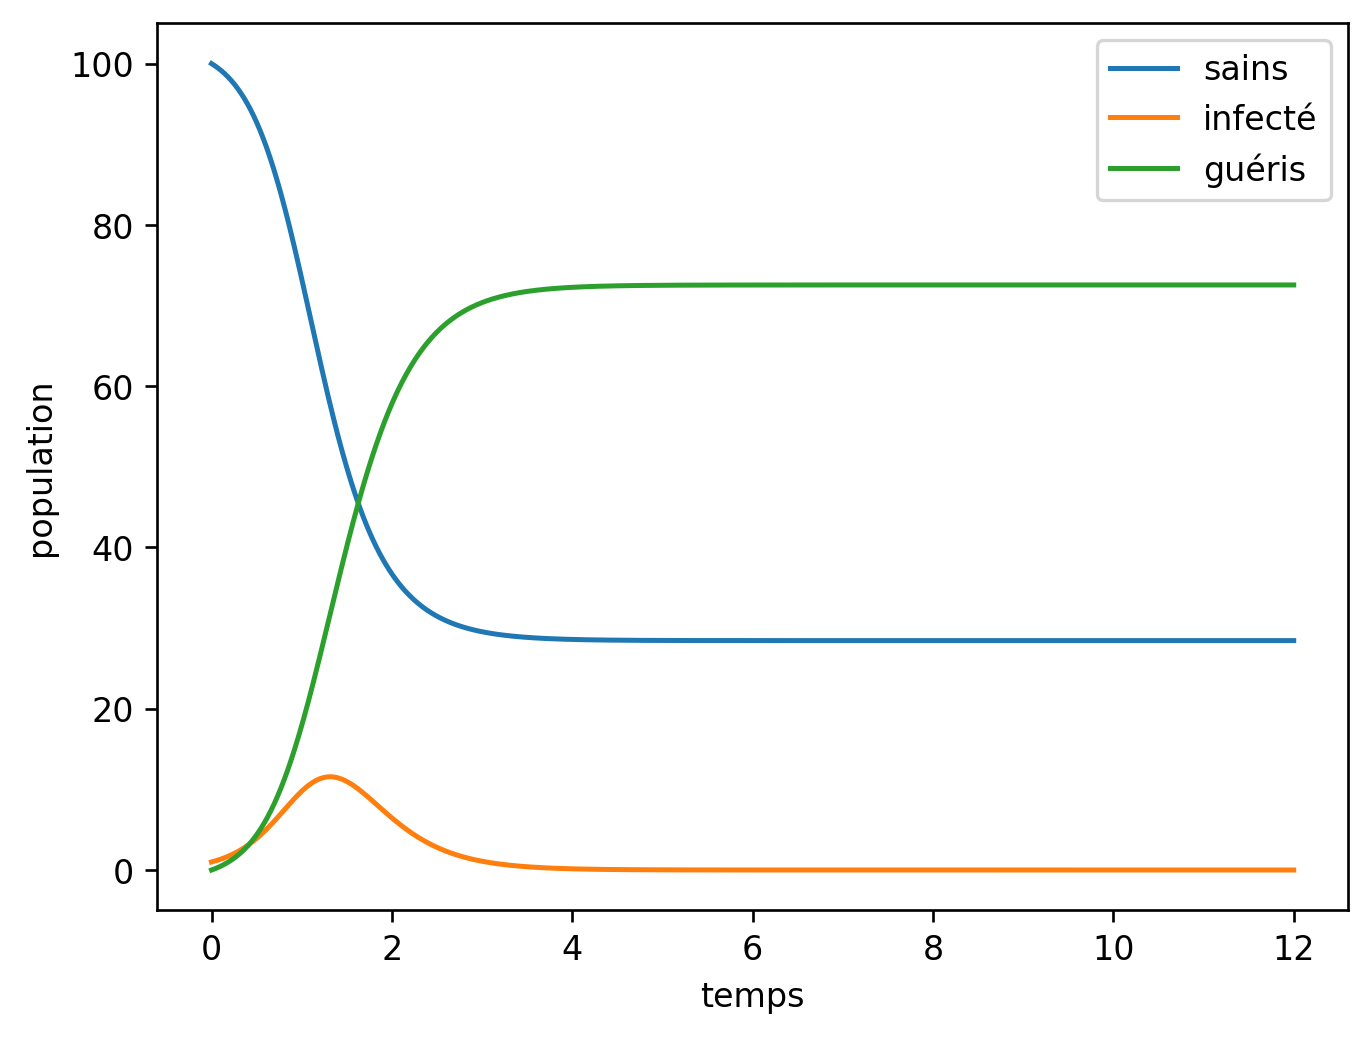

In [39]:
def ex2_calcul_sol(S,m,l,k,Tf,N):
    return GeneralRK4(lambda t,X:np.array([-k*X[0]*X[1]/(X[0]+X[1]+X[2]),k*X[0]*X[1]/(X[0]+X[1]+X[2]) - l*X[1],l*X[1]]),np.array([S,m,0]),Tf,N)

def ex2_affichage_sol(S,m,l,k,Tf,N):
    T=np.linspace(0,Tf,N+1)
    X=ex2_calcul_sol(S,m,l,k,Tf,N)
    plt.plot(T,X[:,0],label='sains')
    plt.plot(T,X[:,1],label='infecté')
    plt.plot(T,X[:,2],label='guéris')
    plt.xlabel('temps')
    plt.ylabel('population')
    plt.legend(loc='upper right')
    print('Population saine au temps T=',Tf,': ',X[N,0])
    print('Population malade au temps T=',Tf,': ',X[N,1])
    print('Population guéris/décédée au temps T=',Tf,': ',X[N,2])

ex2_affichage_sol(100,1,4,7,12,1000)

On compare maintenant au cas où le nombre de malade est de plus en plus petit: $m=0.1$:

Population saine au temps T= 12 :  28.70122791815144
Population malade au temps T= 12 :  9.07706278611281e-08
Population guéris/décédée au temps T= 12 :  71.39877199107809


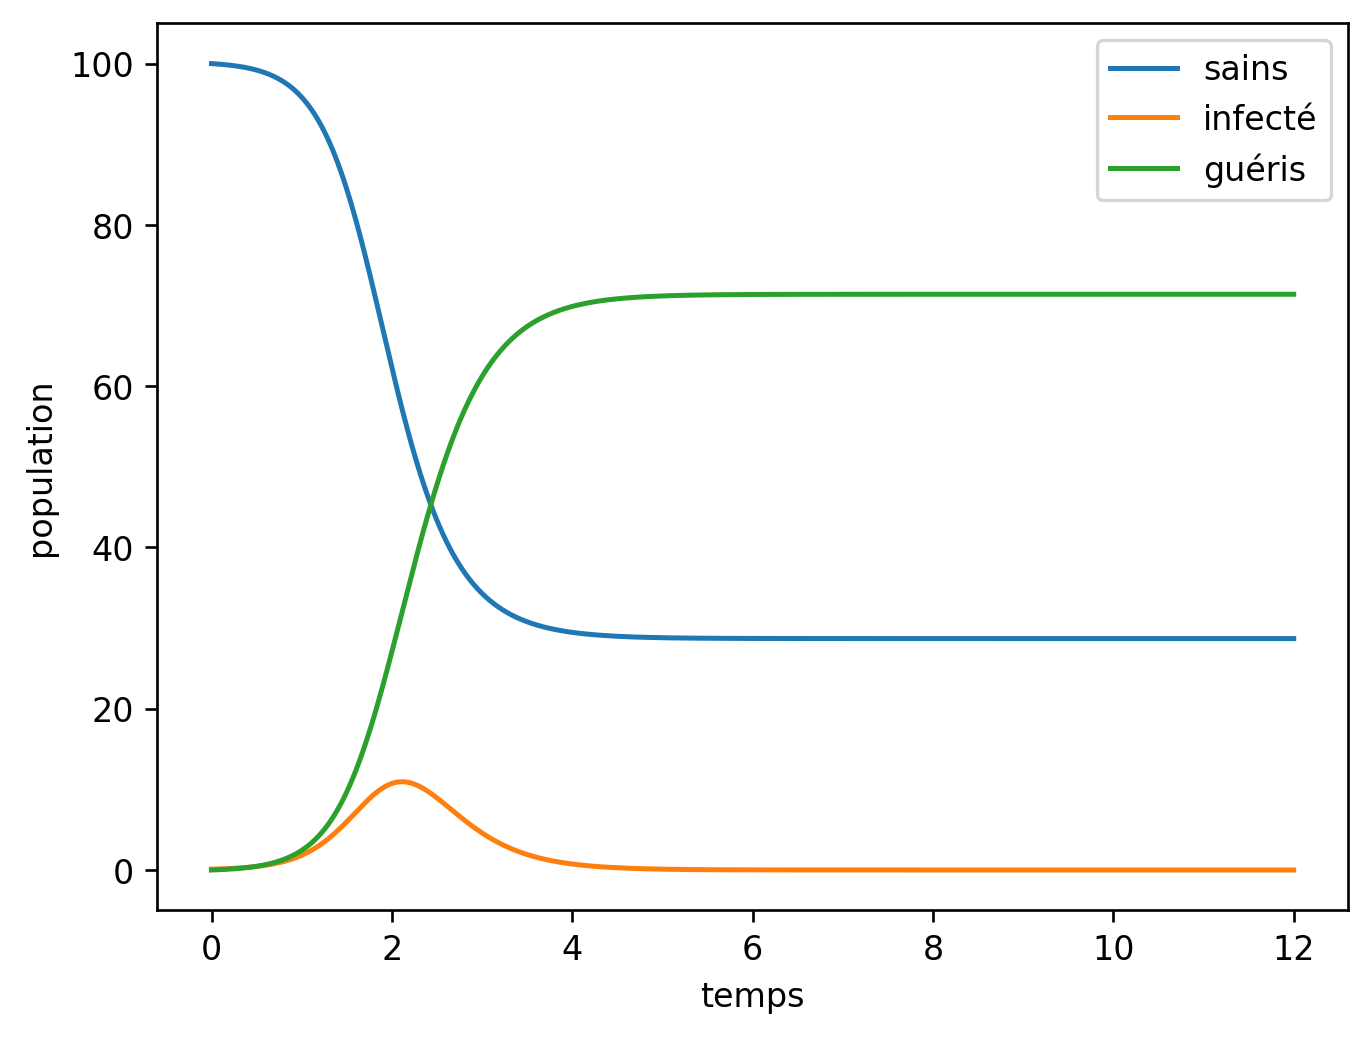

In [40]:
ex2_affichage_sol(100,0.1,4,7,12,1000)

et m=0.01:

Population saine au temps T= 12 :  28.727287623264097
Population malade au temps T= 12 :  4.3550254054800285e-07
Population guéris/décédée au temps T= 12 :  71.28271194123357


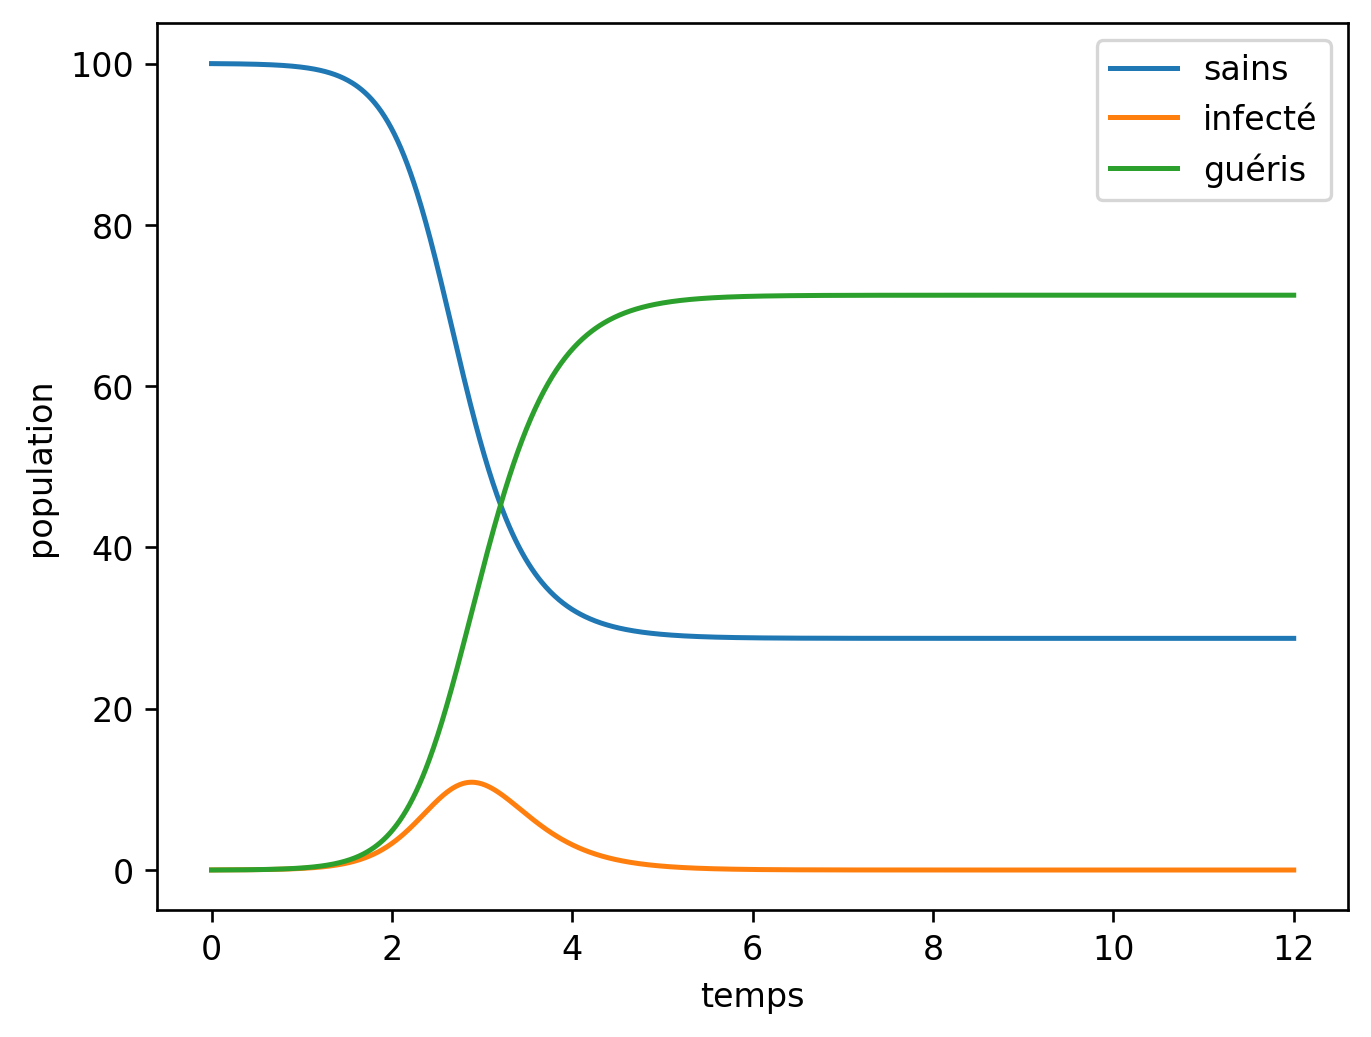

In [41]:
ex2_affichage_sol(100,0.01,4,7,12,1000)

Le profil des solutions est, dans chaque cas, essentiellement le même: peu importe à quel point le nombre d'individus malades introduit est petit, le nombre d'individus sains diminue jusqu'à une limite positive (qui semble converger par valeurs inférieures vers une limite $\approx 28.7$ lorsqu'on fait tendre le nombre de malade initial $m$ vers $0$), le nombre de malades augmente jusqu'à un certain pic puis diminue jusqu'à tendre vers $0$, et le nombre d'infividus guéris/décédes augmente et tend vers une limite.

2) On commence par le terme $-ly$: en l'absence de personnes saines, le nombre de malade $y$ et le nombre de guéris $z$ suivent l'équation
$$ \dot{y}=-ly,\ \dot{z}=ly$$

La première équation signifie que $l$ est le taux de croissance du nombre de malade, en particulier le nombre de malade entre les temps $t$ et $t+\Delta t$ pour un très petit $\Delta t>0$ est de l'ordre de $-l y(t)\ \Delta t$. Ici $1/l$ a l'homogénéité d'un temps, que l'on peut voir comme le temps typique qu'un malade met à guerir: notamment cela sous-entendu que la maladie a une durée (approximative) fixée de l'ordre de $1/l$, qui ne dépend pas de l'entourage.

Dans l'équation de $z$, on compte donc exactement le nombre de malade qui ont guéris, de l'ordre de $+l y(t)\ \Delta t$ entre les temps $t$ et $t+\Delta t$.

Pour le second terme, dans l'équation $\dot{x}=-k\frac{y}{x+y+z}x$: ici la quantité $\frac{y}{x+y+z}$ représente la proportion de malades dans la population: on part du principe que la probabilité de croiser un malade est proportionel à cette proportion, et lorsqu'on croise un malade on a une certaine probabilité de tomber malade à notre tour, avec un taux $k$.



3) On peut observer sur la courbe qu'il ne semble y avoir qu'un seul pic dans notre cas particulier. On écrit une fonction qui donne la liste des pics, en renvoyant éventuellement une liste vide lorsqu'il n'y en a pas

In [42]:
def ex2_recherche_pic(S,m,l,k,Tf,N):
    T=np.linspace(0,Tf,N+1)
    X=ex2_calcul_sol(S,m,l,k,Tf,N)
    L=[]#liste des pics
    P=[]#valeur des pics
    for i in range(1,N):
        if X[i-1,1]<=X[i,1] and X[i,1]>X[i+1,1]:
            L.append(T[i])
            P.append(X[i,1])
    return L,P

In [43]:
L,P=ex2_recherche_pic(100,1,4,7,10,1000)
print("temps d'occurence des pics d'épidémie:",L)#comme on utilise le caractère ' dans le texte, on l'entoure de " ".
print("nombre de malades aux pics:",P)

temps d'occurence des pics d'épidémie: [1.32]
nombre de malades aux pics: [11.561742400383087]


4) On refait la question 1 et 3 avec $k=3$. Les autres paramètres sont fixés de la même manière et on peut réutiliser les codes précédents.

Population saine au temps T= 12 :  97.26354254247727
Population malade au temps T= 12 :  1.7466706802331893e-06
Population guéris/décédée au temps T= 12 :  3.7364557108519696


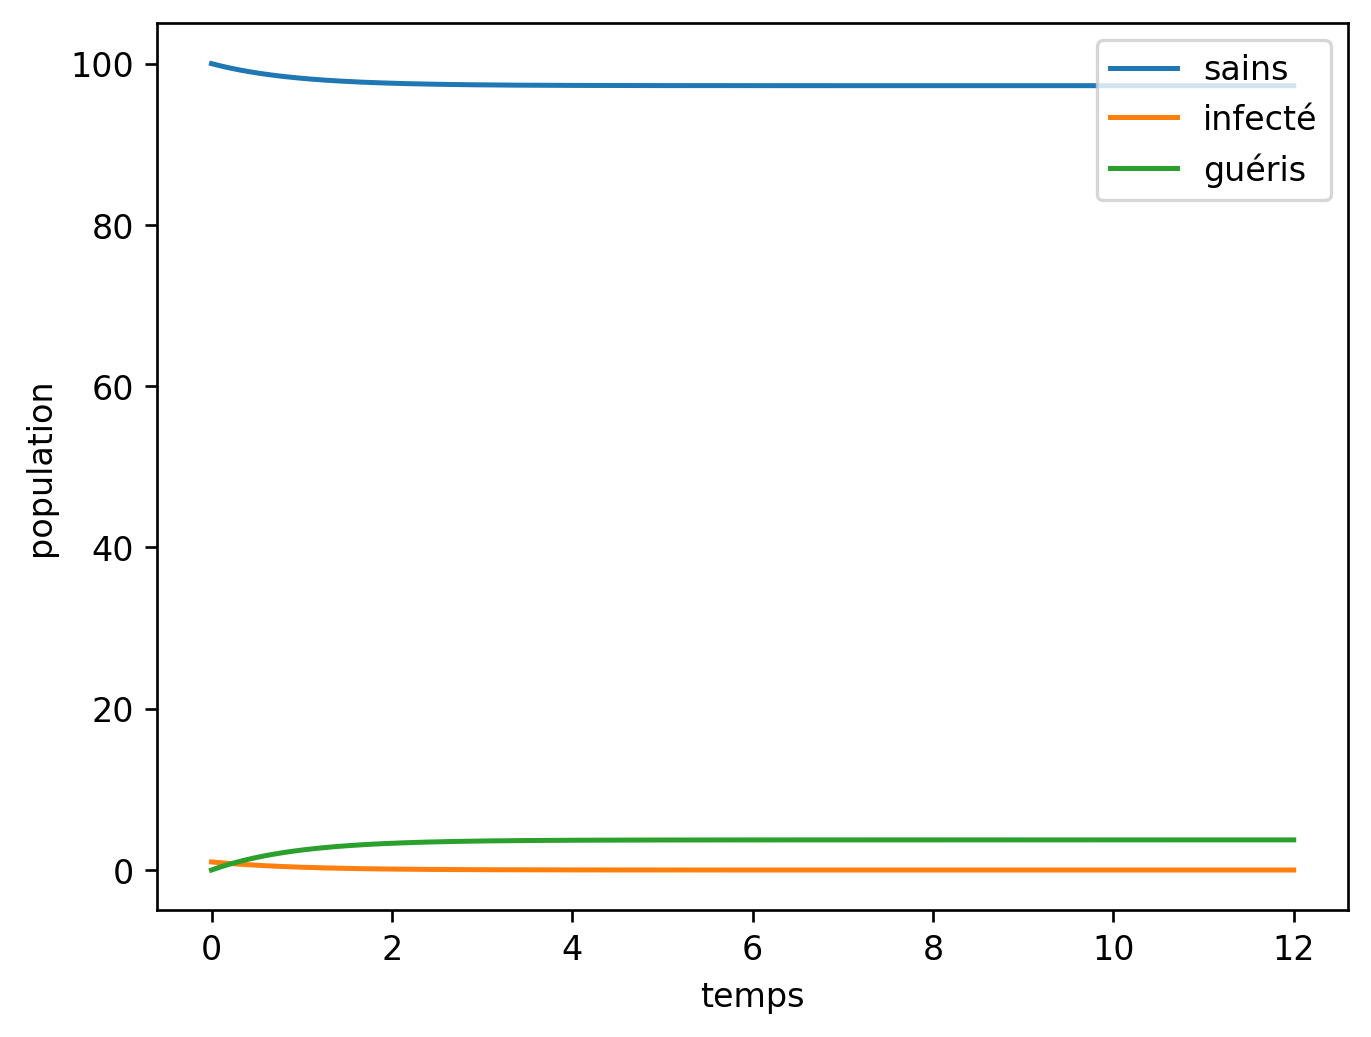

In [44]:
ex2_affichage_sol(100,1,4,3,12,1000)

Comme les graphes prennent des valeurs très différentes, on va les afficher séparéments.

In [45]:
def ex2_affichage_sol(S,m,l,k,Tf,N):
    T=np.linspace(0,Tf,N+1)
    X=ex2_calcul_sol(S,m,l,k,Tf,N)
    
    plt.subplot(2,1,1)#Ces indices signifie qu'on découpe le plot en 2 lignes, 1 colonne, et qu'on regarde le premier plot (énumérés de gauche à droite, de haut en bas)
    plt.plot(T,X[:,0],label='sains')
    plt.ylabel('population')
    plt.legend(loc='upper right')

    plt.subplot(2,1,2)#On regarde le second subplot
    plt.plot(T,X[:,1],label='infecté')
    plt.plot(T,X[:,2],label='guéris')
    plt.xlabel('temps')
    plt.ylabel('population')
    plt.legend(loc='upper right')

    print('Population saine au temps T=',Tf,': ',X[N,0])
    print('Population malade au temps T=',Tf,': ',X[N,1])
    print('Population guéris/décédée au temps T=',Tf,': ',X[N,2])

Population saine au temps T= 12 :  97.26354254247727
Population malade au temps T= 12 :  1.7466706802331893e-06
Population guéris/décédée au temps T= 12 :  3.7364557108519696


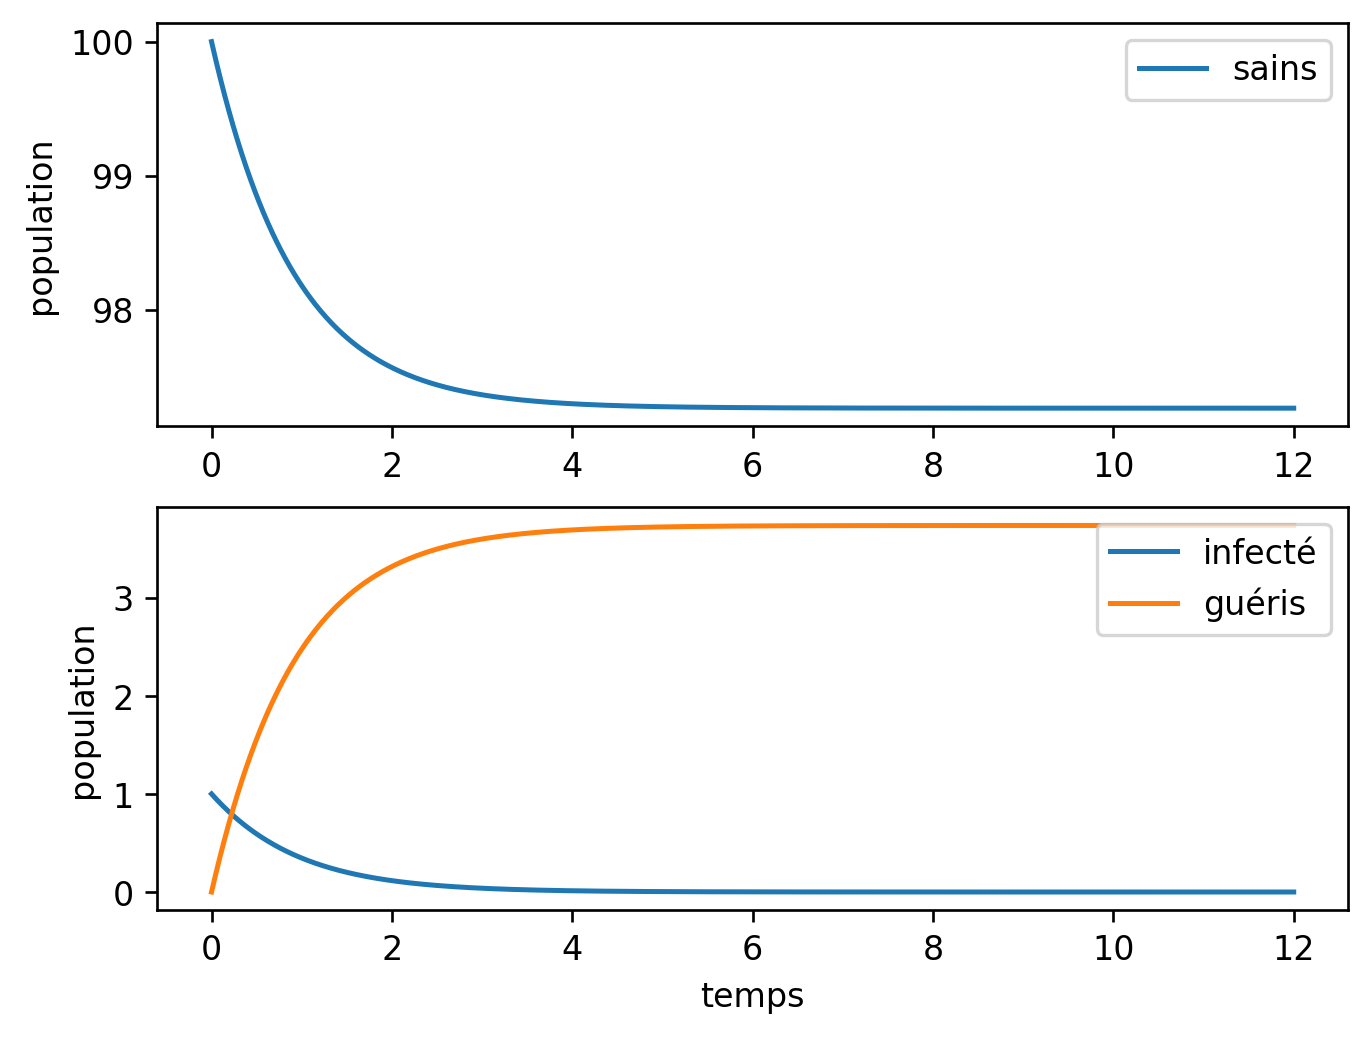

In [46]:
ex2_affichage_sol(100,1,4,3,12,1000)

Il y a une différence notable dans le tableau de variation du nombre de malade: celui-ci ne fait que décroitre, il n'y a pas de pic épidémique. On refait de même avec $m=0.1$;

Population saine au temps T= 12 :  99.70295970254745
Population malade au temps T= 12 :  5.373764751166798e-07
Population guéris/décédée au temps T= 12 :  0.3970397600757703


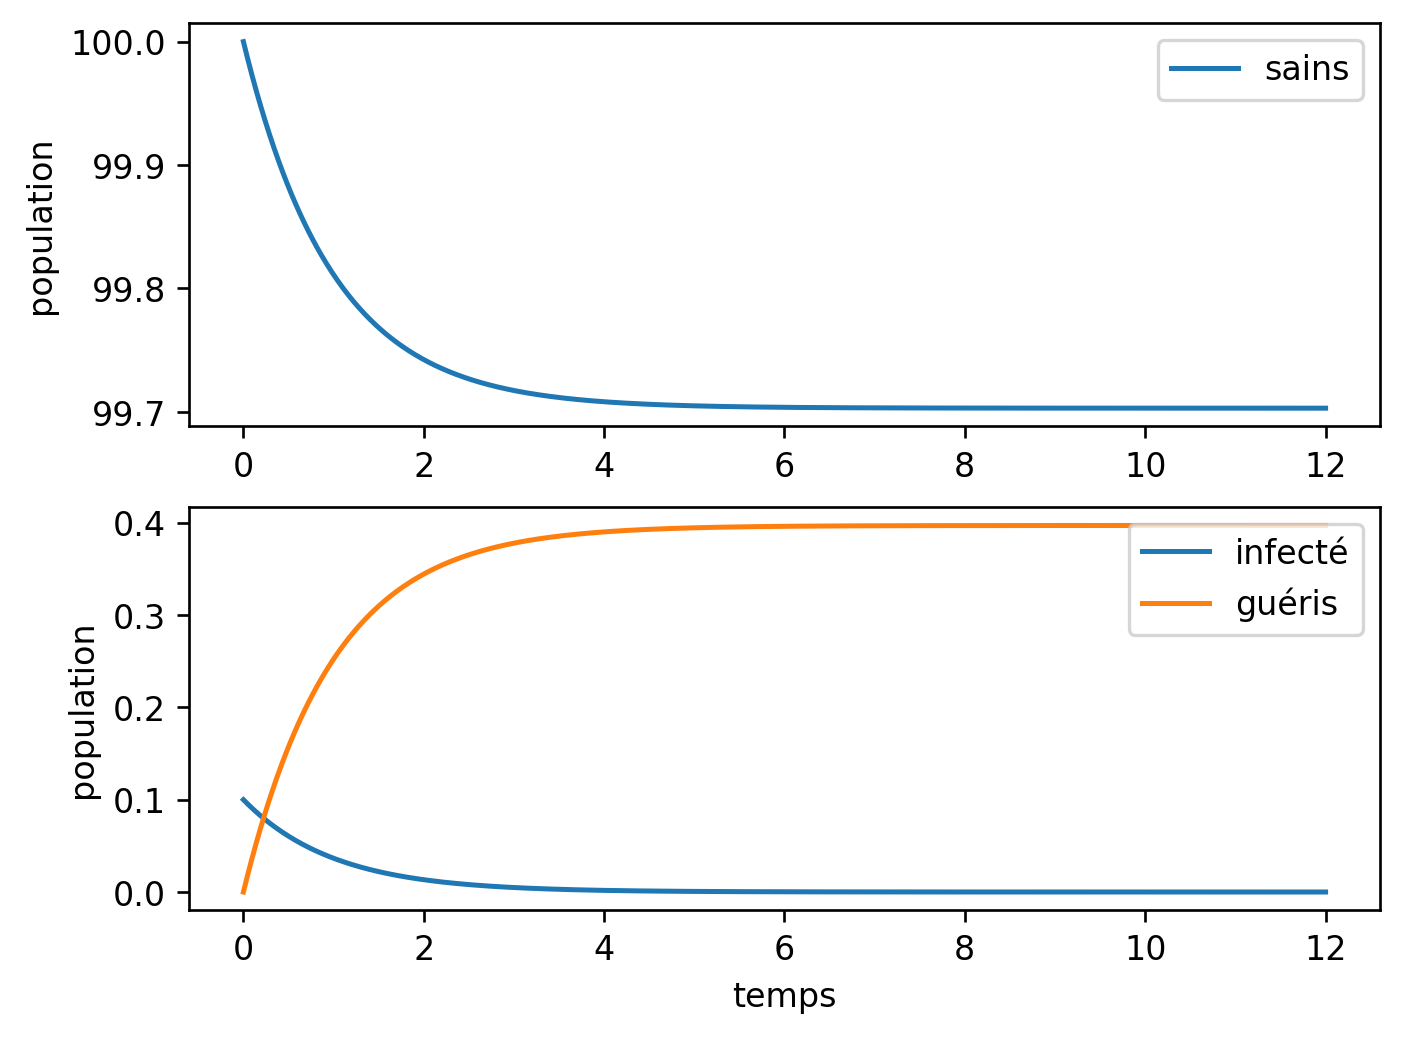

In [47]:
ex2_affichage_sol(100,0.1,4,3,12,1000)

Puis m=0.02:

Population saine au temps T= 12 :  99.94012001806581
Population malade au temps T= 12 :  1.196156808267917e-07
Population guéris/décédée au temps T= 12 :  0.07987986231847272


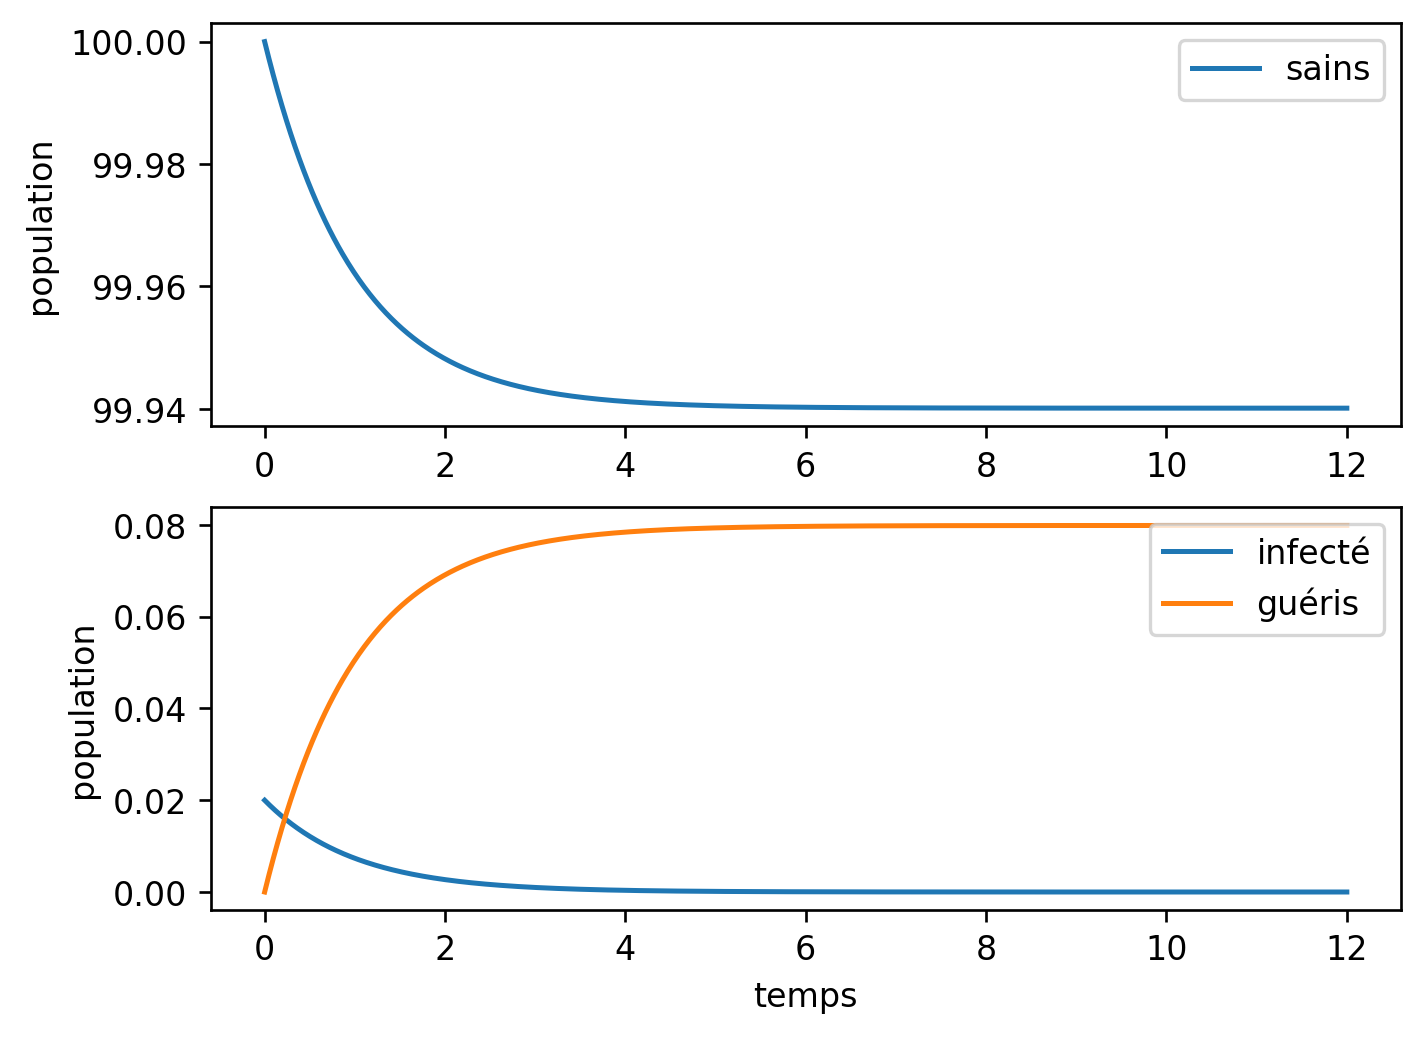

In [48]:
ex2_affichage_sol(100,0.02,4,3,12,1000)

Dans chaque cas le comportement est le même, et il semble que lorsque que le nombre de malades introduits $m$ tend vers $0$, alors l'épidémie prend de moins en moins et le la limite nombre d'individus sain va tendre vers $100$. En particulier il n'y a pas de pic.

5) Soit $t\mapsto (x(t),y(t),z(t))$ une solution, on calcule
\begin{align*}
\frac{d}{dt}\left(x(t)+y(t)+z(t)\right)&=\dot{x}+\dot{y}+\dot{z}\\
&=-k\frac{y}{x+y+z}x+k\frac{y}{x+y+z}x-ly+ly\\
&=0
\end{align*}

Donc c'est une fonction constante, et en regardant la valeur $t=0$ cela donne
$$x(t)+y(t)+z(t)=S+m$$


On cherche maintenant tous les points $(x,y,z)\in\mathbb{R}_{\geq 0}^3$ non tous nuls, de somme $S+m$, tels que
$$
\begin{cases}
0&=-k\frac{y}{x+y+z}x\\
0&=k\frac{y}{x+y+z}x-ly\\
0&=ly
\end{cases}
$$
La troisième équation implique directement que $y=0$, ce qui laisse $x$ et $z$ libres, et les deux premières équation reviennent donc simplement à $0=0$, ce qui est toujours vérifié. Ainsi les points d'équilibres sont tous de la forme $\{(x,0,z),\ x,z\geq 0\text{ tel que }x+z=S+m \}$, et réciproquement tout point de cette forme est bien un point d'équilibre.

Cela signifie qu'à l'équilibre il n'y a plus d'infectés: juste une population divisée en individus sains et individus décédés/guéris.

6) Comme suggeré, on fixe $l(=4)$. On sait ce qui se passe avec $k=3$ et $k=7$, on va fixer $m$ petit ($m=0.1$) et on va tracer le maximum du nombre de malade $y(t)$ en fonction de la valeur de $k$ pour $k$ qui parcourt un intervalle $[3,7]$.

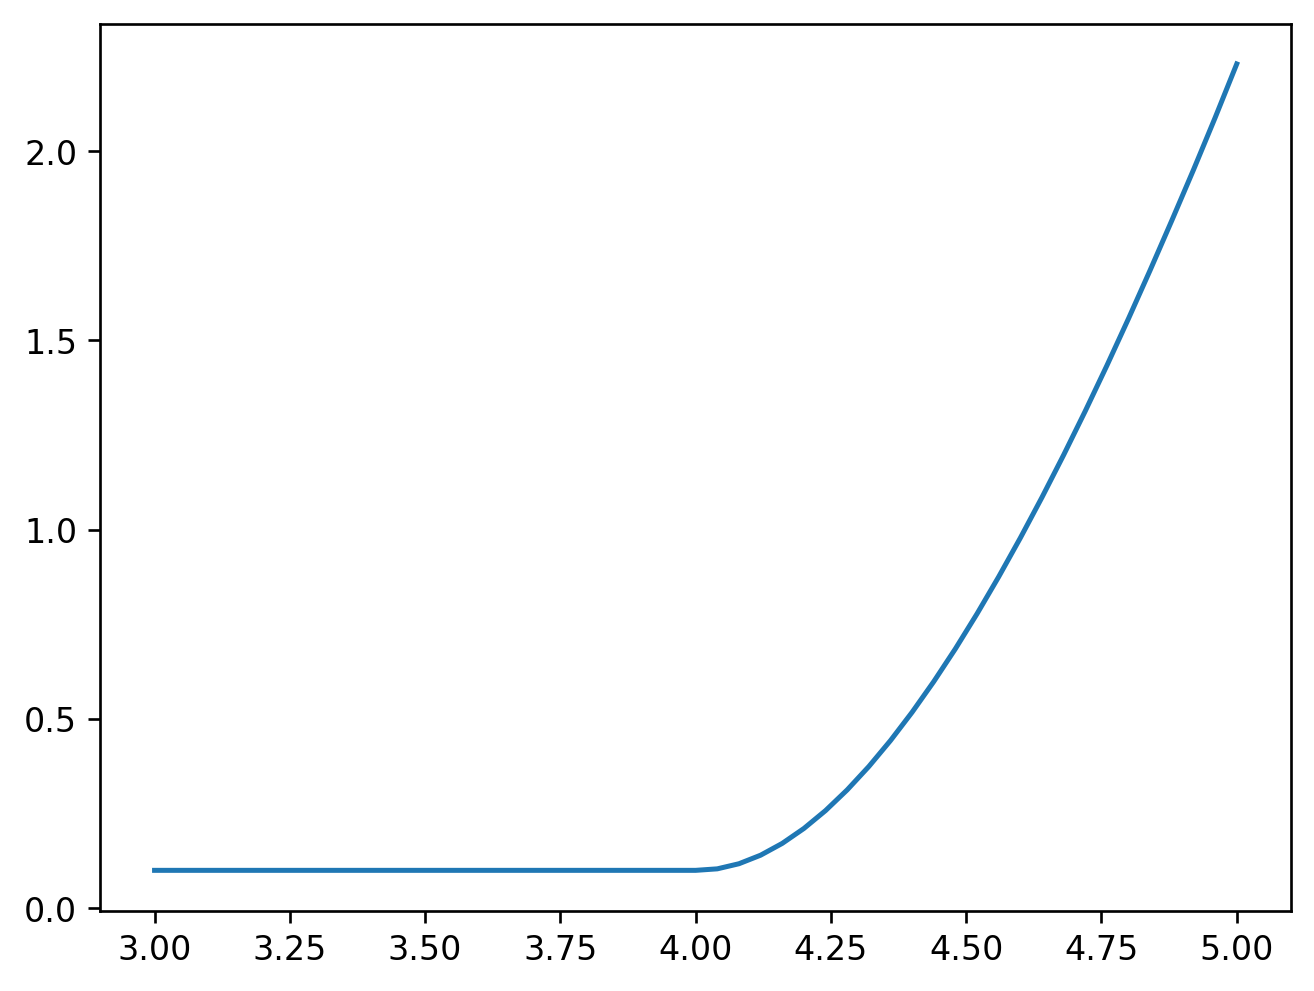

In [49]:
n=50#nombre d'intervalles dans la subdivision
kmin=3
kmax=5#On peut initialement fixer k=7
K=np.linspace(kmin,kmax,n+1)
Ymax=np.zeros(n+1)
for i in range(n+1):
    X=ex2_calcul_sol(100,0.1,4,K[i],15,100)#On fixe Tf=15,N=10000
    Ymax[i]=np.max(X[:,1])# on prend le maximum du nombe de malades
plt.plot(K,Ymax)


La population malade semble décoller à environ $k=4$: on peut émettre la conjecture qu'il y a une épidémie lorsque $k>l$, pas d'épidémie lorsque $k\leq l$.

# Exercice 3


1) On a $$f(0)=l\left(S+m-S\exp(0)-0\right)=lm>0$$ d'un coté, et 
$$f(S+m)=l\left(S+m-S\exp\left(-\frac{k}{l(S+m)}(S+m)\right)-(S+m)\right)=-Sl\exp\left(-\frac{k}{l}\right)<0$$
De plus, $f$ est continue (car composition de fonctions continues), donc $f$ admet une racine entre $0$ et $S+m$.

Question bonus: on calcule $f'(z)=l\left(\frac{kS}{l(S+m)}\exp\left(-\frac{k z}{l(S+m)}\right)-1\right)$.

2)

In [50]:
def ex3_dicho(f,a,b,eps):
    x=a
    y=b
    z=(x+y)/2
    while y-x>eps:
        if f(x)*f(z)<0:
            y=z
        else:
            x=z
        z=(x+y)/2
    return z

3) On applique la fonction précédente à $f$ avec $a=0$, $b=S+m$, $eps=10^{-3}$: cela va nous donner un point d'équilibre de $f$, et donc la valeur limite du nombre total de guéris/décédés.

In [51]:
S,m,l,k=100,1,1,1.5
print('Approximation du nombre total de guéris/décédés: ',ex3_dicho(lambda z:l*(S+m-z-S*np.exp(-k*z/(l*(S+m)))),0,S+m,0.001))

Approximation du nombre total de guéris/décédés:  59.9467887878418


4) On augmente légerement $l$ pour comparer au résultat ci-dessus:

In [52]:
S,m,l,k=100,1,1.1,1.5
print('Approximation du nombre total de guéris/décédés: ',ex3_dicho(lambda z:l*(S+m-z-S*np.exp(-k*z/(l*(S+m)))),0,S+m,0.001))

Approximation du nombre total de guéris/décédés:  50.28000259399414


Augmenter $l$ revient à diminuer la durée typique de la maladie: ce que montre ce calcul est que si la durée d'une maladie (et donc, la durée de contagion) diminue légèrement, alors le nombre total d'individus infectés diminue.

5) Avec $l=2$, on a $k<l$, donc grâce au constat de l'exercice précédent on s'attend à ce qu'il n'y ai pas de pic épidémique.

In [53]:
S,m,l,k=100,1,2,1.5
print('Approximation du nombre total de guéris/décédés: ',ex3_dicho(lambda z:l*(S+m-z-S*np.exp(-k*z/(l*(S+m)))),0,S+m,0.001))

Approximation du nombre total de guéris/décédés:  3.736103057861328


In [54]:
S,m,l,k=100,1,2.1,1.5
print('Approximation du nombre total de guéris/décédés: ',ex3_dicho(lambda z:l*(S+m-z-S*np.exp(-k*z/(l*(S+m)))),0,S+m,0.001))

Approximation du nombre total de guéris/décédés:  3.322307586669922


Le comportement est toujours le même: lorsqu'on augmente légerement $l$, le nombre total de guéris/décédés diminue légèrement.

6) En utilisant les équation de $x$ et $z$:

$$\frac{\dot{x}}{x}=-\frac{1}{x}\frac{kxy}{x+y+z}=-\frac{ky}{S+m}=-\frac{k}{l(x+y+z)}\dot{z}$$
car $\dot{z}=ly$.

7) On a $x(t)+y(t)+z(t)=S+m$ pour tout $t$, donc
$$\frac{\dot{x}}{x}=-\frac{k}{l(S+m)}\dot{z}$$
On intègre de $0$ à $t$:
$$\int_{0}^{t}\frac{\dot{x}(\tau)}{x(\tau)}d\tau=\int_{0}^{t}-\frac{k}{l(S+m)}\dot{z}(\tau)d\tau$$

On remarque que $\frac{\dot{x}(\tau)}{x(\tau)}=\frac{d}{d\tau}\log x(\tau)$, donc en intégrant:
$$\left[\log x(\tau)\right]_{\tau=0}^{\tau=t}=\left[-\frac{k}{l(S+m)}z(\tau)\right]_{\tau=0}^{\tau=t}$$

Comme $x(0)=S$ et $z(0)=0$, cela donne
$$\log(x(t)/S)=-\frac{k}{l(S+m)}z(t)$$
Et donc en isolant $x$, on a

$$x(t)/S=\exp\left(-\frac{k}{l(S+m)}z(t)\right)$$

et donc

$$x(t)=S\exp\left(-\frac{k}{l(S+m)}z(t)\right)$$

8) On reprend l'équation de $z$:
\begin{align*}
\dot{z}&=ly\\
&=l\left(S+m-x-z\right)\\
&=l\left(S+m-S\exp\left(-\frac{k}{l(S+m)}z\right)-z\right)\\
&=f(z)
\end{align*}

